Dataset: https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset

Columns :

CustomerID: Unique identifier for each customer

SubscriptionType: Type of subscription plan chosen by the customer (e.g., Basic, Premium, Deluxe)

PaymentMethod: Method used for payment (e.g., Credit Card, Electronic Check, PayPal)

PaperlessBilling: Whether the customer uses paperless billing (Yes/No)

ContentType: Type of content accessed by the customer (e.g., Movies, TV Shows, Documentaries)

MultiDeviceAccess: Whether the customer has access on multiple devices (Yes/No)

DeviceRegistered: Device registered by the customer (e.g., Smartphone, Smart TV, Laptop)

GenrePreference: Genre preference of the customer (e.g., Action, Drama, Comedy)

Gender: Gender of the customer (Male/Female)

ParentalControl: Whether parental control is enabled (Yes/No)

SubtitlesEnabled: Whether subtitles are enabled (Yes/No)

AccountAge: Age of the customer's subscription account (in months)

MonthlyCharges: Monthly subscription charges

TotalCharges: Total charges incurred by the customer

ViewingHoursPerWeek: Average number of viewing hours per week

SupportTicketsPerMonth: Number of customer support tickets raised per month

AverageViewingDuration: Average duration of each viewing session

ContentDownloadsPerMonth: Number of content downloads per month

UserRating: Customer satisfaction rating (1 to 5)

WatchlistSize: Size of the customer's content watchlist

Churn: Situation of customer churn or not (target variable)

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("train.csv")
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [24]:
df.SubscriptionType.value_counts()

SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64

In [25]:
print(df.isnull().sum())
print(df.duplicated().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64
0


In [26]:
df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

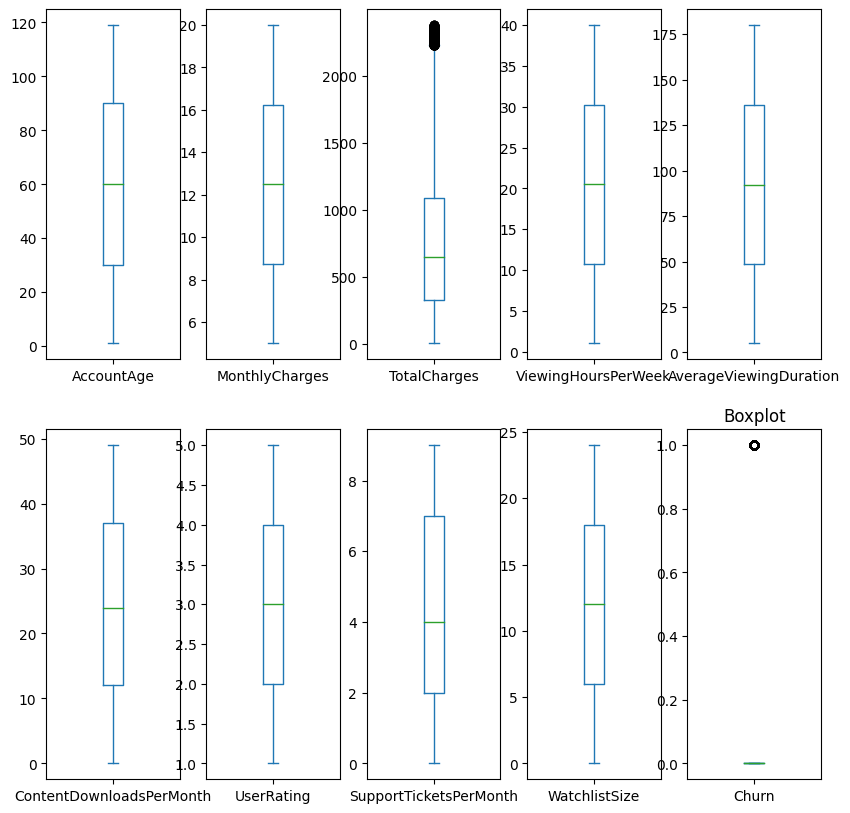

In [27]:
df.plot(kind="box", subplots=True, figsize=(10, 10), layout=(2, 5))
plt.title("Boxplot")
plt.show()

# there are outliers in total charges

In [28]:
class outlierremoval:
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5
  
	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker
		
remover = outlierremoval(df["TotalCharges"])
df["TotalCharges"]=df["TotalCharges"].apply(remover.remove)

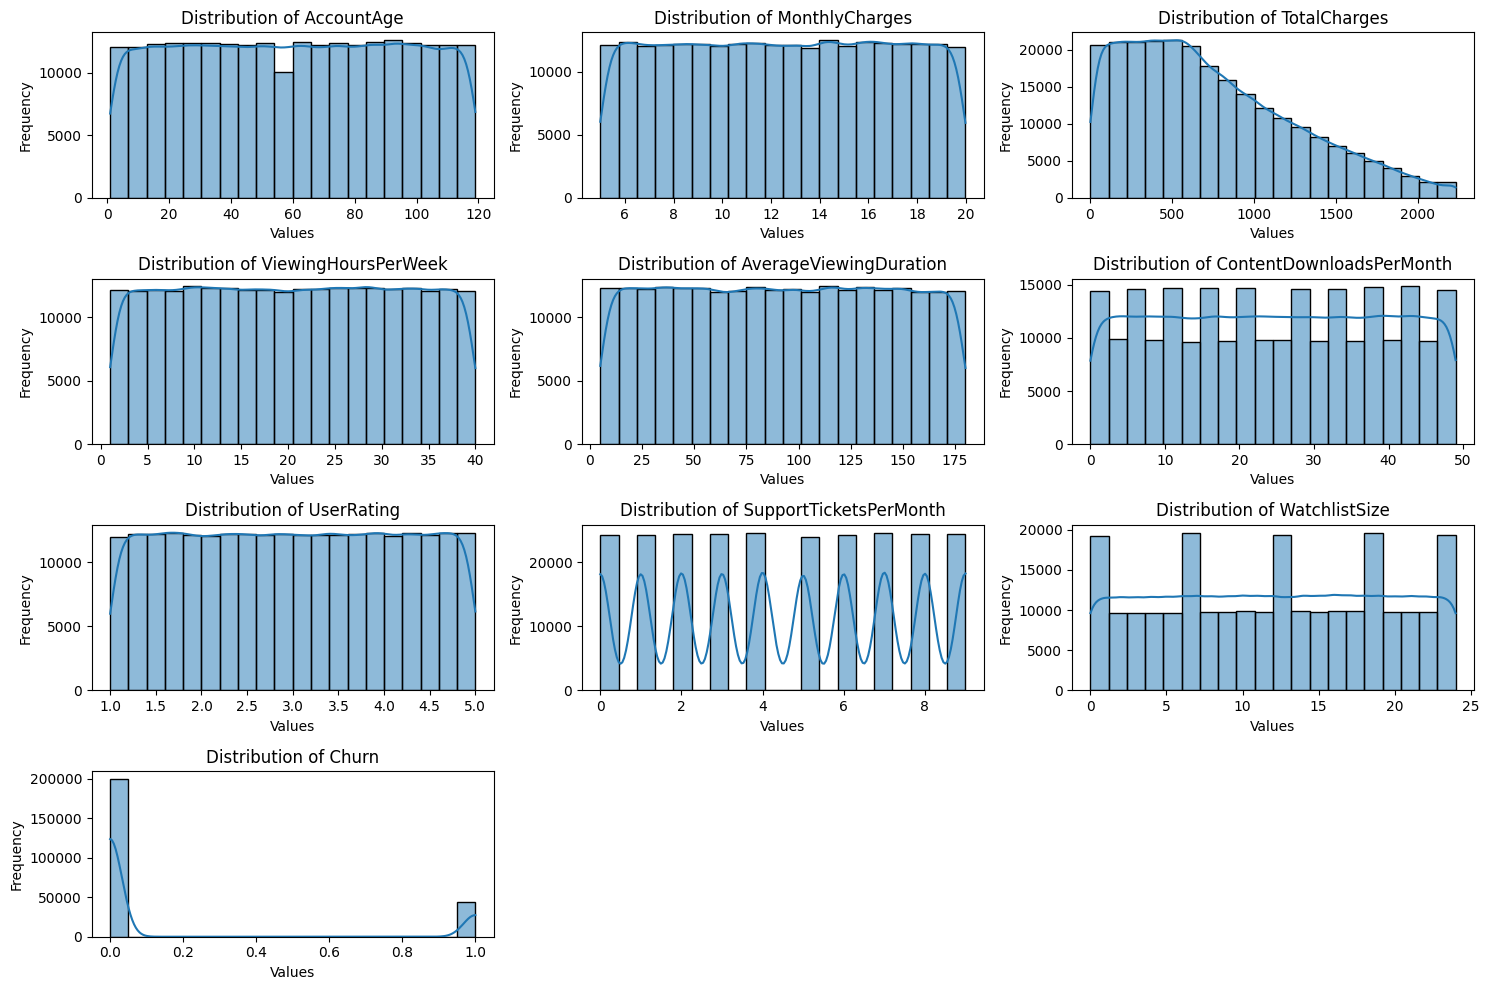

In [29]:
# Select only numerical columns for histogram plotting
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Determine rows and columns dynamically
num_plots = len(numeric_cols)
ncols = 3  # Set number of columns
nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # Calculate rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()  # Flatten in case of 2D array

# Plot histograms for each numerical column
for i, column in enumerate(numeric_cols):
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if the number of columns is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty plots

plt.tight_layout()
plt.show()


### the above indicates the churn dataset is imbalanced

<AxesSubplot:>

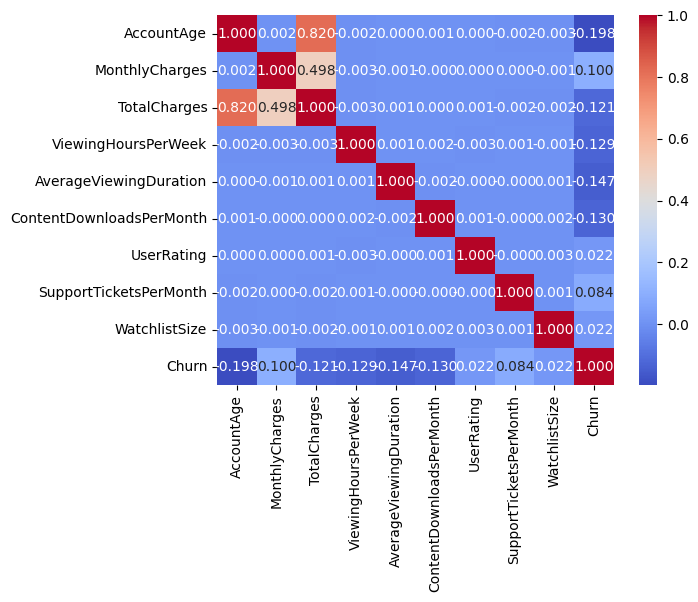

In [30]:
sns.heatmap(data=df[numeric_cols].corr(), annot=True, fmt=".3f", cmap='coolwarm')

In [31]:
df.AccountAge.describe()

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: AccountAge, dtype: float64

In [33]:
features_to_keep = ['ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'SupportTicketsPerMonth',
       'AccountAge', 'MonthlyCharges',
       'UserRating', 'TotalCharges',
       'ParentalControl']
df[features_to_keep].describe()


,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,AccountAge,MonthlyCharges,UserRating,TotalCharges
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,20.502179,92.264061,24.503513,4.504186,60.083758,12.490695,3.002713,750.576557
std,11.243753,50.505243,14.421174,2.872548,34.285143,4.327615,1.155259,522.595394
min,1.000065,5.000547,0.000000,0.000000,1.000000,4.990062,1.000007,4.991154
25%,10.763953,48.382395,12.000000,2.000000,30.000000,8.738543,2.000853,329.147027
50%,20.523116,92.249992,24.000000,4.000000,60.000000,12.495555,3.002261,649.878487
75%,30.219396,135.908048,37.000000,7.000000,90.000000,16.238160,4.002157,1089.317362
max,39.999723,179.999275,49.000000,9.000000,119.000000,19.989957,4.999989,2229.572864


In [35]:
df['ParentalControl'].value_counts()

ParentalControl
Yes    122085
No     121702
Name: count, dtype: int64

In [12]:
age_bins = [0, 30, 60, 90, 120]  # Based on quartiles
age_labels = [0, 1, 2, 3]  # Encoding (0: Young, 1: Mid, 2: Senior, 3: Very Senior)

# ordinal encoding
df['AccountAge_Bucket'] = pd.cut(df['AccountAge'], bins=age_bins, labels=age_labels, include_lowest=True)

In [13]:

# Ordinal Encoding for `SubscriptionType`
subscription_mapping = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df['SubscriptionType_Encoded'] = df['SubscriptionType'].map(subscription_mapping)

In [14]:
df.drop(columns=['SubscriptionType', 'AccountAge'], inplace=True)

In [15]:

# One-Hot Encoding for Categorical Features (Excluding SubscriptionType)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('CustomerID')  # exclude this

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:

# Standard Scaling for Numerical Features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Churn')  # Target variable should not be scaled
numerical_cols.remove('SubscriptionType_Encoded')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [17]:
df.drop(columns=['CustomerID'], inplace=True)

In [18]:
df.columns

Index(['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'Churn', 'AccountAge_Bucket',
       'SubscriptionType_Encoded', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_Yes', 'ContentType_Movies', 'ContentType_TV Shows',
       'MultiDeviceAccess_Yes', 'DeviceRegistered_Mobile',
       'DeviceRegistered_TV', 'DeviceRegistered_Tablet',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi', 'Gender_Male',
       'ParentalControl_Yes', 'SubtitlesEnabled_Yes'],
      dtype='object')

In [19]:
targets = df['Churn']

In [20]:
from autogluon.tabular import TabularPredictor

In [26]:
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df["Churn"], random_state=42)

predictor = TabularPredictor(label="Churn", eval_metric="accuracy").fit(train_data, time_limit=600)

performance = predictor.evaluate(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250318_165444"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20250318_165444"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #57-Ubuntu SMP PREEMPT_DYNAMIC Wed F

In [27]:
print(predictor.leaderboard(test_data))


                  model  score_test  score_val eval_metric  pred_time_test  \
0      RandomForestEntr    0.822306     0.8192    accuracy        1.199390   
1   WeightedEnsemble_L2    0.822080     0.8232    accuracy        2.910386   
2      RandomForestGini    0.821957     0.8228    accuracy        1.708733   
3        ExtraTreesGini    0.820788     0.8204    accuracy        1.243495   
4              CatBoost    0.820768     0.8224    accuracy        0.095471   
5        ExtraTreesEntr    0.820091     0.8196    accuracy        1.068022   
6               XGBoost    0.819824     0.8204    accuracy        0.165497   
7         LightGBMLarge    0.818758     0.8188    accuracy        0.010148   
8              LightGBM    0.818758     0.8188    accuracy        0.011908   
9            LightGBMXT    0.818758     0.8188    accuracy        0.012296   
10       KNeighborsUnif    0.801161     0.7996    accuracy        5.161871   
11       KNeighborsDist    0.800751     0.8000    accuracy      

In [ ]:
feature_importance = predictor.feature_importance(test_data)
print(feature_importance)

Computing feature importance via permutation shuffling for 27 features using 5000 rows with 5 shuffle sets...
	260.45s	= Expected runtime (52.09s per shuffle set)
	32.2s	= Actual runtime (Completed 5 of 5 shuffle sets)


                                  importance    stddev   p_value  n  p99_high  \
ViewingHoursPerWeek             3.560000e-03  0.002071  0.009197  5  0.007824   
AverageViewingDuration          3.360000e-03  0.001846  0.007613  5  0.007161   
ContentDownloadsPerMonth        2.120000e-03  0.002225  0.050090  5  0.006702   
SupportTicketsPerMonth          1.720000e-03  0.001963  0.060804  5  0.005761   
AccountAge_Bucket               1.400000e-03  0.000872  0.011471  5  0.003195   
MonthlyCharges                  1.320000e-03  0.001585  0.068019  5  0.004583   
SubscriptionType_Encoded        8.000000e-04  0.002005  0.211354  5  0.004928   
UserRating                      6.800000e-04  0.000756  0.057369  5  0.002237   
ContentType_TV Shows            4.400000e-04  0.000498  0.059697  5  0.001465   
TotalCharges                    4.000000e-04  0.001631  0.306291  5  0.003758   
GenrePreference_Drama           3.200000e-04  0.000179  0.008065  5  0.000688   
ParentalControl_Yes         

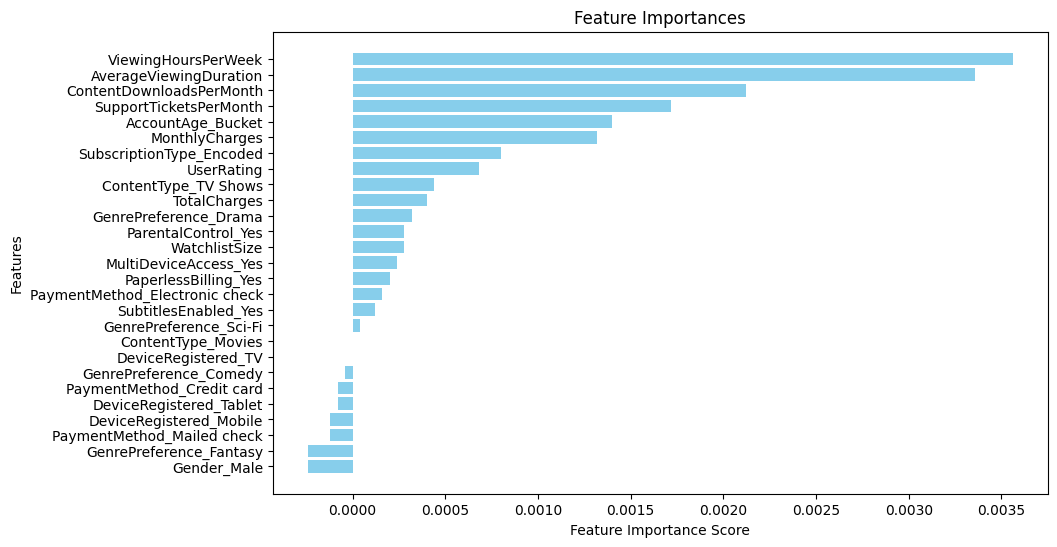

In [ ]:
feature_importance.sort_values("importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance["importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [29]:
best_model = predictor.get_model_best()
print(f"Best Model: {best_model}")

Best Model: WeightedEnsemble_L2


In [ ]:
from autogluon.tabular import TabularPredictor

# Load the predictor
predictor_orig = TabularPredictor.load(path="AutogluonModels/ag-20250318_165444")

# Make predictions


In [33]:
df.columns

Index(['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'Churn', 'AccountAge_Bucket',
       'SubscriptionType_Encoded', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_Yes', 'ContentType_Movies', 'ContentType_TV Shows',
       'MultiDeviceAccess_Yes', 'DeviceRegistered_Mobile',
       'DeviceRegistered_TV', 'DeviceRegistered_Tablet',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi', 'Gender_Male',
       'ParentalControl_Yes', 'SubtitlesEnabled_Yes'],
      dtype='object')

In [35]:
# features to keep
feature_importance.index

Index(['ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'SupportTicketsPerMonth',
       'AccountAge_Bucket', 'MonthlyCharges', 'SubscriptionType_Encoded',
       'UserRating', 'ContentType_TV Shows', 'TotalCharges',
       'GenrePreference_Drama', 'ParentalControl_Yes', 'WatchlistSize',
       'MultiDeviceAccess_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'SubtitlesEnabled_Yes',
       'GenrePreference_Sci-Fi', 'ContentType_Movies', 'DeviceRegistered_TV',
       'GenrePreference_Comedy', 'PaymentMethod_Credit card',
       'DeviceRegistered_Tablet', 'DeviceRegistered_Mobile',
       'PaymentMethod_Mailed check', 'GenrePreference_Fantasy', 'Gender_Male'],
      dtype='object')

In [52]:
features_to_keep = ['ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'SupportTicketsPerMonth',
       'AccountAge_Bucket', 'MonthlyCharges',
       'UserRating', 'TotalCharges',
       'ParentalControl_Yes', 'Churn']


In [53]:
df[features_to_keep]

,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,SupportTicketsPerMonth,AccountAge_Bucket,MonthlyCharges,UserRating,TotalCharges,ParentalControl_Yes,Churn
0,1.445777,-0.568906,-1.005712,-0.175519,0,-0.331703,-0.715179,-1.013161,False,0
1,1.062671,-1.317459,-0.450971,1.216976,1,-1.690423,0.411960,-0.871785,False,0
2,-1.165718,-0.691019,-0.104258,0.520728,2,-0.088741,1.069988,0.254900,True,0
3,0.663322,0.777613,0.381141,-0.871766,1,-1.207816,1.102179,-0.991470,True,0
4,-0.037246,-0.928765,-0.312285,-0.175519,1,1.031143,0.531014,0.412842,False,0
...,...,...,...,...,...,...,...,...,...,...
243782,-0.622520,-0.235555,1.559965,-1.219890,2,-0.658746,0.601371,-0.015890,True,0
243783,0.396764,-0.642422,0.727854,-0.175519,3,0.129070,-1.344265,1.485256,False,0
243784,-0.878129,1.661653,1.351938,0.520728,3,0.467666,0.873836,1.702218,True,0
243785,0.886236,1.210218,0.797197,0.868852,0,1.305539,-0.750417,-1.193263,False,0


In [54]:
df

,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,AccountAge_Bucket,...,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Male,ParentalControl_Yes,SubtitlesEnabled_Yes
0,-0.331703,-1.013161,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786,0,0,...,True,False,False,False,False,False,True,True,False,False
1,-1.690423,-0.871785,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687,0,1,...,False,False,True,False,False,False,False,True,False,True
2,-0.088741,0.254900,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833,0,2,...,False,False,False,False,False,True,False,True,True,True
3,-1.207816,-0.991470,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711,0,1,...,False,False,True,False,True,False,False,True,True,True
4,1.031143,0.412842,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857,0,1,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,-0.658746,-0.015890,-0.622520,-0.235555,1.559965,0.601371,-1.219890,-0.558668,0,2,...,False,False,False,False,False,False,True,True,True,False
243783,0.129070,1.485256,0.396764,-0.642422,0.727854,-1.344265,-0.175519,1.109616,0,3,...,False,True,False,True,False,False,False,True,False,False
243784,0.467666,1.702218,-0.878129,1.661653,1.351938,0.873836,0.520728,0.136451,0,3,...,False,True,False,False,False,False,False,True,True,True
243785,1.305539,-1.193263,0.886236,1.210218,0.797197,-0.750417,0.868852,-0.975739,0,0,...,False,True,False,False,False,True,False,False,False,True


In [55]:
train_data_2, test_data_2 = train_test_split(df[features_to_keep], test_size=0.2, stratify=df["Churn"], random_state=42)

predictor_2 = TabularPredictor(label="Churn", eval_metric="accuracy").fit(train_data_2, time_limit=600)


No path specified. Models will be saved in: "AutogluonModels/ag-20250318_172523"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20250318_172523"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #57-Ubuntu SMP PREEMPT_DYNAMIC Wed F

In [56]:
performance = predictor_2.evaluate(test_data_2)

In [57]:
print(predictor_2.leaderboard(test_data_2))


                  model  score_test  score_val eval_metric  pred_time_test  \
0        ExtraTreesEntr    0.822306     0.8204    accuracy        0.857711   
1      RandomForestEntr    0.821691     0.8200    accuracy        1.046366   
2        ExtraTreesGini    0.821424     0.8232    accuracy        1.105672   
3      RandomForestGini    0.821301     0.8192    accuracy        1.171378   
4              CatBoost    0.821096     0.8224    accuracy        0.109770   
5   WeightedEnsemble_L2    0.821096     0.8236    accuracy        2.866855   
6               XGBoost    0.820460     0.8208    accuracy        0.139848   
7            LightGBMXT    0.818758     0.8188    accuracy        0.007710   
8         LightGBMLarge    0.818758     0.8188    accuracy        0.007744   
9              LightGBM    0.818758     0.8188    accuracy        0.007776   
10       KNeighborsUnif    0.798064     0.7996    accuracy        1.229680   
11       KNeighborsDist    0.797244     0.7992    accuracy      

In [58]:
feature_importance = predictor_2.feature_importance(test_data_2)
print(feature_importance)

Computing feature importance via permutation shuffling for 9 features using 5000 rows with 5 shuffle sets...
	40.81s	= Expected runtime (8.16s per shuffle set)
	17.53s	= Actual runtime (Completed 5 of 5 shuffle sets)


                          importance    stddev   p_value  n  p99_high  \
AverageViewingDuration       0.00368  0.002292  0.011474  5  0.008399   
AccountAge_Bucket            0.00328  0.000955  0.000773  5  0.005246   
ViewingHoursPerWeek          0.00304  0.002651  0.031182  5  0.008499   
ContentDownloadsPerMonth     0.00300  0.001497  0.005486  5  0.006082   
MonthlyCharges               0.00212  0.000944  0.003695  5  0.004065   
SupportTicketsPerMonth       0.00136  0.002377  0.134932  5  0.006253   
TotalCharges                 0.00052  0.000687  0.082907  5  0.001935   
UserRating                  -0.00012  0.001262  0.579007  5  0.002478   
ParentalControl_Yes         -0.00012  0.000672  0.644900  5  0.001264   

                           p99_low  
AverageViewingDuration   -0.001039  
AccountAge_Bucket         0.001314  
ViewingHoursPerWeek      -0.002419  
ContentDownloadsPerMonth -0.000082  
MonthlyCharges            0.000175  
SupportTicketsPerMonth   -0.003533  
TotalCharg

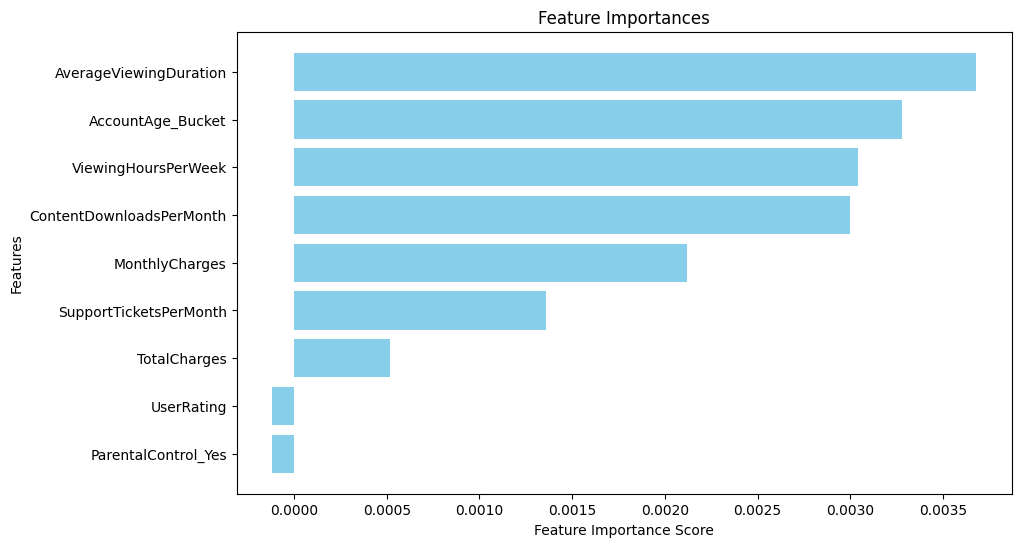

In [59]:
feature_importance.sort_values("importance", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance["importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Load dataset
df = pd.read_csv("train.csv")

def manual_binning(value, bins, labels):
    return labels[np.digitize(value, bins, right=True)]

# Define bins and labels for each feature
bin_dict = {
    "ViewingHoursPerWeek": ([10, 20, 30], ["Low", "Medium", "High", "Very High"]),
    "AverageViewingDuration": ([48, 92, 136], ["Short", "Medium", "Long", "Very Long"]),
    "ContentDownloadsPerMonth": ([12, 24, 37], ["Rare", "Moderate", "Frequent", "Very Frequent"]),
    "SupportTicketsPerMonth": ([2, 4, 7], ["Low", "Medium", "High", "Very High"]),
    "AccountAge": ([30, 60, 90], ["New", "Intermediate", "Old", "Very Old"]),
    "MonthlyCharges": ([8, 12, 16], ["Low", "Medium", "High", "Very High"]),
    "UserRating": ([2, 3, 4], ["Poor", "Average", "Good", "Excellent"]),
    "TotalCharges": ([329, 650, 1089], ["Low", "Medium", "High", "Very High"])
}

# Apply manual bucketing
for feature, (bins, labels) in bin_dict.items():
    df[f"{feature}_Bucket"] = df[feature].apply(lambda x: manual_binning(x, bins, labels))

# Ordinal Encoding for bucketed features
ordinal_encoder = OrdinalEncoder()
bucket_features = [f"{feature}_Bucket" for feature in bin_dict.keys()]
df[bucket_features] = ordinal_encoder.fit_transform(df[bucket_features])

# One-Hot Encoding for ParentalControl
df = pd.get_dummies(df, columns=["ParentalControl"], drop_first=True)
df['ParentalControl_Yes'] = df['ParentalControl_Yes'].astype(int)

# Drop original features (optional, if you only want encoded features)
df.drop(columns=list(bin_dict.keys()), inplace=True)


/home/dyuthi/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/dyuthi/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,WatchlistSize,SubtitlesEnabled,...,Churn,ViewingHoursPerWeek_Bucket,AverageViewingDuration_Bucket,ContentDownloadsPerMonth_Bucket,SupportTicketsPerMonth_Bucket,AccountAge_Bucket,MonthlyCharges_Bucket,UserRating_Bucket,TotalCharges_Bucket,ParentalControl_Yes
0,Premium,Mailed check,No,Both,No,Mobile,Sci-Fi,Male,3,No,...,0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,0
1,Basic,Credit card,Yes,Movies,No,Tablet,Action,Male,23,Yes,...,0,3.0,2.0,1.0,3.0,0.0,1.0,2.0,1.0,0
2,Basic,Mailed check,Yes,Movies,No,Computer,Fantasy,Male,1,Yes,...,0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1
3,Basic,Electronic check,No,TV Shows,No,Tablet,Drama,Male,24,Yes,...,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1
4,Premium,Electronic check,Yes,TV Shows,No,TV,Comedy,Female,0,No,...,0,0.0,2.0,1.0,2.0,0.0,3.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,Basic,Mailed check,No,Movies,No,Computer,Sci-Fi,Male,8,No,...,0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,0.0,1
243783,Premium,Credit card,No,TV Shows,Yes,TV,Comedy,Male,20,No,...,0,0.0,1.0,0.0,2.0,3.0,0.0,3.0,3.0,0
243784,Premium,Credit card,Yes,TV Shows,No,TV,Action,Male,13,Yes,...,0,2.0,3.0,3.0,0.0,3.0,0.0,1.0,3.0,1
243785,Premium,Bank transfer,Yes,TV Shows,No,TV,Fantasy,Female,5,Yes,...,0,3.0,3.0,0.0,0.0,1.0,3.0,0.0,1.0,0


In [3]:

features_to_keep = ['ViewingHoursPerWeek_Bucket', 'AverageViewingDuration_Bucket',
       'ContentDownloadsPerMonth_Bucket', 'SupportTicketsPerMonth_Bucket',
       'AccountAge_Bucket', 'MonthlyCharges_Bucket',
       'UserRating_Bucket', 'TotalCharges_Bucket',
       'ParentalControl_Yes', 'Churn']
df[features_to_keep]

,ViewingHoursPerWeek_Bucket,AverageViewingDuration_Bucket,ContentDownloadsPerMonth_Bucket,SupportTicketsPerMonth_Bucket,AccountAge_Bucket,MonthlyCharges_Bucket,UserRating_Bucket,TotalCharges_Bucket,ParentalControl_Yes,Churn
0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,0,0
1,3.0,2.0,1.0,3.0,0.0,1.0,2.0,1.0,0,0
2,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1,0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,0
4,0.0,2.0,1.0,2.0,0.0,3.0,2.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
243782,2.0,1.0,3.0,1.0,2.0,2.0,2.0,0.0,1,0
243783,0.0,1.0,0.0,2.0,3.0,0.0,3.0,3.0,0,0
243784,2.0,3.0,3.0,0.0,3.0,0.0,1.0,3.0,1,0
243785,3.0,3.0,0.0,0.0,1.0,3.0,0.0,1.0,0,0


In [6]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test Split (Stratified)
X = df[features_to_keep].drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8227
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     39921
           1       0.57      0.09      0.16      8837

    accuracy                           0.82     48758
   macro avg       0.70      0.54      0.53     48758
weighted avg       0.78      0.82      0.77     48758



In [18]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Train-Test Split (Stratified)
X = df[features_to_keep].drop(columns=["Churn"])
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Oversample minority class to match majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standard Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42
)

# Smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5], 
    'min_child_weight': [1, 3],  
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1] 
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Predictions with the best model
y_pred = best_xgb_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 64 candidates, totalling 320 fits


/home/dyuthi/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/dyuthi/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/dyuthi/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/dyuthi/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core im

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.7612
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     39921
           1       0.38      0.48      0.42      8837

    accuracy                           0.76     48758
   macro avg       0.63      0.65      0.64     48758
weighted avg       0.79      0.76      0.77     48758



In [53]:
import joblib
joblib.dump(xgb_model, "xgboost_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
import numpy as np
import joblib
import pandas as pd

# Load trained model and scaler
xgb_model = joblib.load("xgboost_churn_model.pkl")
scaler = joblib.load("scaler.pkl")

# Define ordinal encoding mapping
# Bucket ranges and their meanings:
# ViewingHoursPerWeek: Low (1-10), Medium (11-20), High (21-30), Very High (31-40)
# AverageViewingDuration: Short (5-50 mins), Moderate (51-100 mins), Long (101-150 mins), Very Long (151-180 mins)
# ContentDownloadsPerMonth: Rare (0-12), Intermediate (13-24), Frequent (25-36), Very Frequent (37-49)
# SupportTicketsPerMonth: Low (0-2), Moderate (3-5), High (6-7), Very High (8-9)
# AccountAge: New (1-30 months), Growing (31-60 months), Loyal (61-90 months), Veteran (91-119 months)
# MonthlyCharges: Low (4-10), Medium (11-14), High (15-17), Very High (18-20)
# UserRating: Poor (1-2), Average (3), Good (4), Excellent (5)
# TotalCharges: Low (5-400), Medium (401-800), High (801-1200), Very High (1201-2229)


# ViewingHoursPerWeek Mapping
viewing_hours_per_week_mapping = {
    "Low": 0, 
    "Medium": 1, 
    "High": 2, 
    "Very High": 3
}

# AverageViewingDuration Mapping
average_viewing_duration_mapping = {
    "Short": 0, 
    "Moderate": 1, 
    "Long": 2, 
    "Very Long": 3
}

# ContentDownloadsPerMonth Mapping
content_downloads_per_month_mapping = {
    "Rare": 0, 
    "Intermediate": 1, 
    "Frequent": 2, 
    "Very Frequent": 3
}

# SupportTicketsPerMonth Mapping
support_tickets_per_month_mapping = {
    "Low": 0, 
    "Moderate": 1, 
    "High": 2, 
    "Very High": 3
}

# AccountAge Mapping
account_age_mapping = {
    "New": 0, 
    "Growing": 1, 
    "Loyal": 2, 
    "Veteran": 3
}

# MonthlyCharges Mapping
monthly_charges_mapping = {
    "Low": 0, 
    "Medium": 1, 
    "High": 2, 
    "Very High": 3
}

# UserRating Mapping
user_rating_mapping = {
    "Poor": 0, 
    "Average": 1, 
    "Good": 2, 
    "Excellent": 3
}

# TotalCharges Mapping
total_charges_mapping = {
    "Low": 0, 
    "Medium": 1, 
    "High": 2, 
    "Very High": 3
}

# Prediction function (input is already a bucket)
def predict_churn(viewing_hours_bucket, avg_viewing_duration_bucket, content_downloads_bucket, 
                   support_tickets_bucket, account_age_bucket, monthly_charges_bucket, 
                   user_rating_bucket, total_charges_bucket, parental_control):
    """
    Takes bucketed user input, applies encoding & scaling, and returns a churn prediction.
    """
    # Apply ordinal encoding
    input_data = {
        "ViewingHoursPerWeek_Bucket": viewing_hours_per_week_mapping[viewing_hours_bucket],
        "AverageViewingDuration_Bucket": average_viewing_duration_mapping[avg_viewing_duration_bucket],
        "ContentDownloadsPerMonth_Bucket": content_downloads_per_month_mapping[content_downloads_bucket],
        "SupportTicketsPerMonth_Bucket": support_tickets_per_month_mapping[support_tickets_bucket],
        "AccountAge_Bucket": account_age_mapping[account_age_bucket],  # Now calculated
        "MonthlyCharges_Bucket": monthly_charges_mapping[monthly_charges_bucket],
        "UserRating_Bucket": user_rating_mapping[user_rating_bucket],
        "TotalCharges_Bucket": total_charges_mapping[total_charges_bucket],
        "ParentalControl_Yes": 1 if parental_control == "Yes" else 0  # One-hot encoding
    }

    

    # Convert to NumPy array and reshape for scaling
    input_array = np.array(list(input_data.values())).reshape(1, -1)

    input_df = pd.DataFrame(input_array, columns=[
        "ViewingHoursPerWeek_Bucket", "AverageViewingDuration_Bucket", "ContentDownloadsPerMonth_Bucket", 
        "SupportTicketsPerMonth_Bucket", "AccountAge_Bucket", "MonthlyCharges_Bucket", 
        "UserRating_Bucket", "TotalCharges_Bucket", "ParentalControl_Yes"
    ])

    # Apply standard scaling
    input_scaled = scaler.transform(input_df)

    # Make prediction
    # prediction = xgb_model.predict(input_scaled)[0]
    probability = xgb_model.predict_proba(input_scaled)[0][1]  # Get probability of churn
    prediction = 1 if probability >= 0.2 else 0  # Apply optimal threshold

    return "Churn" if prediction == 1 else "No Churn", probability

    # return "Churn" if prediction == 1 else "No Churn"

# Example usage
predicted_churn = predict_churn(viewing_hours_bucket="Low", avg_viewing_duration_bucket="Short", 
                                content_downloads_bucket="Frequent", support_tickets_bucket="Low",
                                account_age_bucket="New", monthly_charges_bucket="Low", 
                                user_rating_bucket="Poor", total_charges_bucket="Low",
                                parental_control="Yes")

print("Predicted Outcome:", predicted_churn)


Predicted Outcome: ('Churn', 0.20930572)
